In [60]:
%matplotlib inline
import numpy as np

import qcodes as qc

from typing import List, Dict, Tuple, Any
import matplotlib.pyplot as plt
from matplotlib import ticker
import qcodes as qc
from qcodes import Parameter, new_experiment, Measurement, initialise_database, load_or_create_experiment, load_by_id,initialise_or_create_database_at
from qcodes.dataset.plotting import plot_dataset,plot_by_id

plt.rcParams['figure.figsize'] = [6.0, 4.0]
plt.rcParams['figure.dpi'] = 150


In [ ]:
initialise_or_create_database_at('D:\database_files\FF1A_2021_2.db')

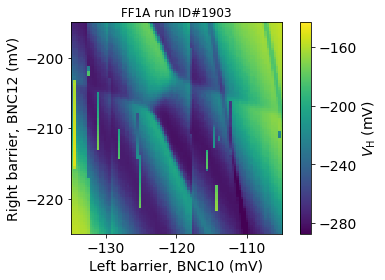

In [63]:
ds=load_by_id(1903)

x=ds.get_parameter_data()['agi2_volt']['qdac2_BNC10']
x = x*1000
y=ds.get_parameter_data()['agi2_volt']['qdac2_BNC12']
y = y*1000
z=ds.get_parameter_data()['agi2_volt']['agi2_volt']
z = z*1000

z=z.reshape(91,91)
z = z.transpose()
c = plt.imshow(z,origin='lower',extent=(min(x),max(x),min(y),max(y)),aspect='1', vmin=0.95*z.min(),vmax=0.95*z.max())

cb = plt.colorbar(c, label = 'V_H (mV)')
cb.set_label(label='$V_\mathrm{H}$ (mV)', size='14')
cb.ax.tick_params(labelsize='14')

tick_locator = ticker.MaxNLocator(nbins=4)
cb.locator = tick_locator
cb.update_ticks()


plt.xlabel('Left barrier, BNC10 (mV)', size = 14)
plt.ylabel('Right barrier, BNC12 (mV)',size = 14)
plt.title( f"FF1A run ID#{ds.captured_run_id}")
plt.tick_params(labelsize= 14)
plt.tight_layout()
plt.locator_params(axis="y", nbins=4)
plt.locator_params(axis="x", nbins=4)


plt.savefig(f"{ds.captured_run_id}.pdf")

([<matplotlib.axes._subplots.AxesSubplot at 0x20cc1d636c8>],
 [<matplotlib.colorbar.Colorbar at 0x20cc0c45848>])

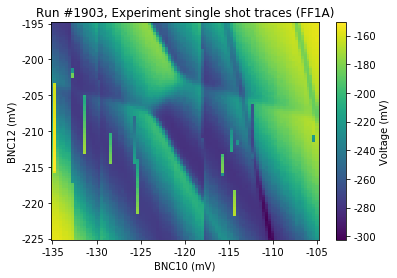

In [8]:
plot_by_id(1903)